In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils

In [2]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

In [3]:
dataframes = {}

categories = ['Entertainment', 'Music'] 

for category in categories:

    df = pd.read_parquet(f"{VIDEO_METADATA_PATH}/{category}.parquet.gz")
    df = data_utils.cast_df(df, type='video_metadata')
    df.dropna(inplace=True)
    
    dataframes[f'df_metadata_{category}'] = df

df_music = dataframes['df_metadata_Music']
df_entertainment = dataframes['df_metadata_Entertainment']




In [13]:
print(df_entertainment['view_count'].quantile(0.89))

153505.75


In [14]:
df_music_1 = df_music.copy(deep=True)
df_entertainment_1 = df_entertainment.copy(deep=True)

df_entertainment_1 = df_entertainment_1[df_entertainment_1['view_count'] != 0]
df_music_1 = df_music_1[df_music_1['view_count'] != 0]



In [22]:
threshold = df_music_1['view_count'].quantile(0.85)

df_famous_music_1 = df_music_1[df_music_1['view_count'] > threshold]
df_famous_entertainment_1 = df_entertainment_1[df_entertainment_1['view_count'] > threshold]

Now we have only "famous" videos, no 0 vues, no Nan

/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_2613/2877161324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous_entertainment_1['engagement_score'] = (
/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_2613/2877161324.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_famous_music_1['engagement_score'] = (
/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_2613/2877161324.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

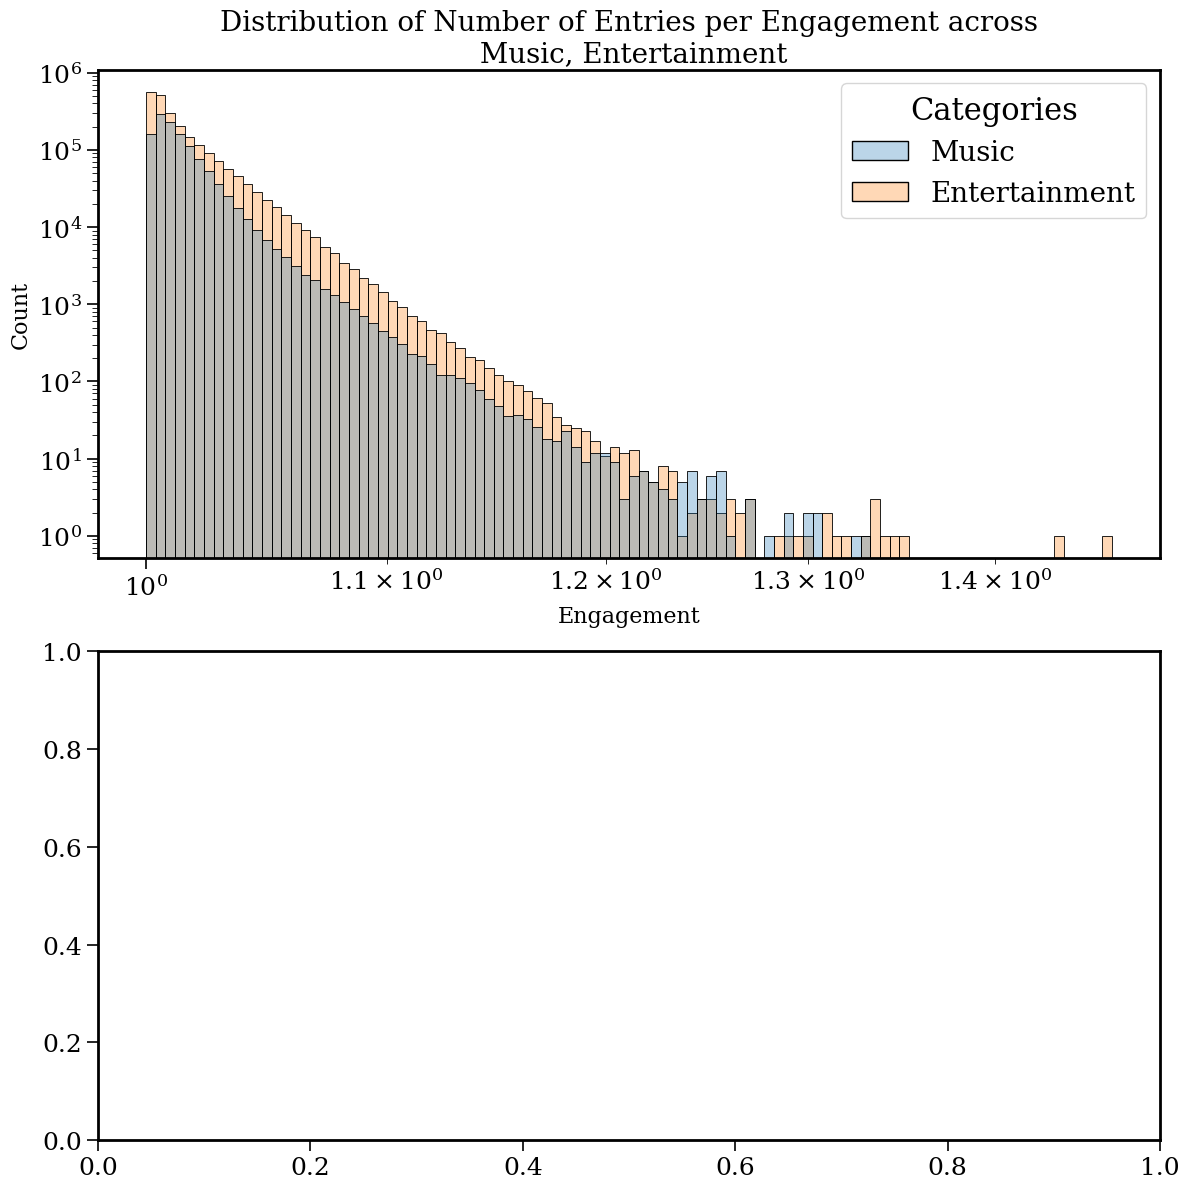

In [23]:
# Engagement analysis
# Creation of engagement score for the 2 datasets
df_famous_entertainment_1['engagement_score'] = (
    ((df_famous_entertainment_1['like_count'] + df_famous_entertainment_1['dislike_count']) / df_famous_entertainment_1['view_count'])
)

df_famous_music_1['engagement_score'] = (
    ((df_famous_music_1['like_count'] + df_famous_music_1['dislike_count']) / df_famous_music_1['view_count'])
)

# Monetization analysis
# Définition du CPM hypothétique pour chaque catégorie
cpm_music = 1.5
cpm_entertainment = 2.0

# Calculer le revenu estimé pour df_music
df_famous_music_1['duration_factor'] = 1 + 0.5 * (df_famous_music_1['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_famous_music_1['estimated_revenue'] = (
    (df_famous_music_1['view_count'] / 1000) * cpm_music * df_famous_music_1['duration_factor']
)

# Calculer le revenu estimé pour df_entertainment
df_famous_entertainment_1['duration_factor'] = 1 + 0.5 * (df_famous_entertainment_1['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_famous_entertainment_1['estimated_revenue'] = (
    (df_famous_entertainment_1['view_count'] / 1000) * cpm_entertainment * df_famous_entertainment_1['duration_factor']
)

# now every video has a "estimated revenue" and "engagement score" value

df_famous_metadata_compare =  pd.concat([df_famous_music_1, df_famous_entertainment_1], axis=0)

categories = ["Music", "Entertainment"]

data_utils.compare_distribution_across_categories(df_famous_metadata_compare,
                                                  columns=["estimated_revenue"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[True],
                                                  kind="hist",
                                                  hue="categories")


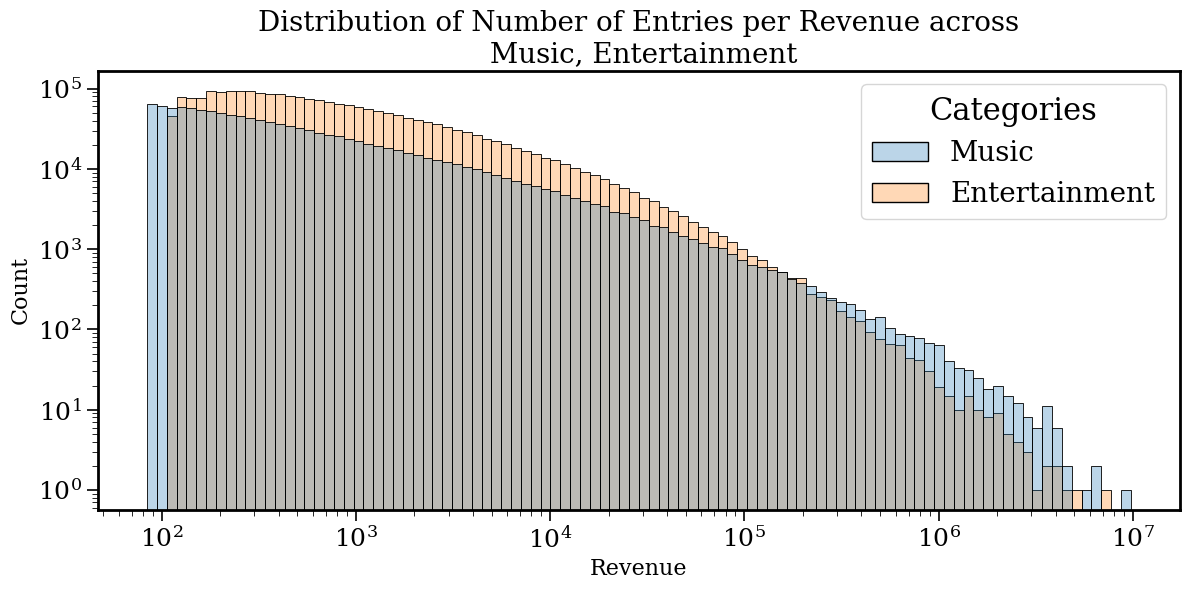

In [24]:
data_utils.compare_distribution_across_categories(df_famous_metadata_compare,
                                                  columns=["estimated_revenue"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[True],
                                                  kind="hist",
                                                  hue="categories")

In [26]:
print(df_famous_entertainment_1['duration'].describe())

count    2.282985e+06
mean     6.789399e+02
std      1.453233e+03
min      1.000000e+00
25%      1.740000e+02
50%      3.450000e+02
75%      7.360000e+02
max      1.728000e+05
Name: duration, dtype: float64


Now data are cleaned and separated in 2 dataframes

In [4]:
df_entertainment = df_entertainment[df_entertainment['view_count'] != 0]
df_music = df_music[df_music['view_count'] != 0]

# Creation of engagement score for the 2 datasets
df_entertainment['engagement_score'] = (
    ((df_entertainment['like_count'] + df_entertainment['dislike_count']) / df_entertainment['view_count'])
)

df_music['engagement_score'] = (
    ((df_music['like_count'] + df_music['dislike_count']) / df_music['view_count'])
)

threshold_music = df_music['engagement_score'].quantile(0.9999)
df_music_filtered = df_music[df_music['engagement_score'] <= threshold_music]
threshold_entertainment = df_entertainment['engagement_score'].quantile(0.9999)
df_entertainment_filtered = df_entertainment[df_entertainment['engagement_score'] <= threshold_entertainment]


/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_91189/2664298709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_entertainment['engagement_score'] = (
/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_91189/2664298709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['engagement_score'] = (


In [5]:
# print(df_entertainment['engagement_score'].tail())

KeyError: 'engagement_score'

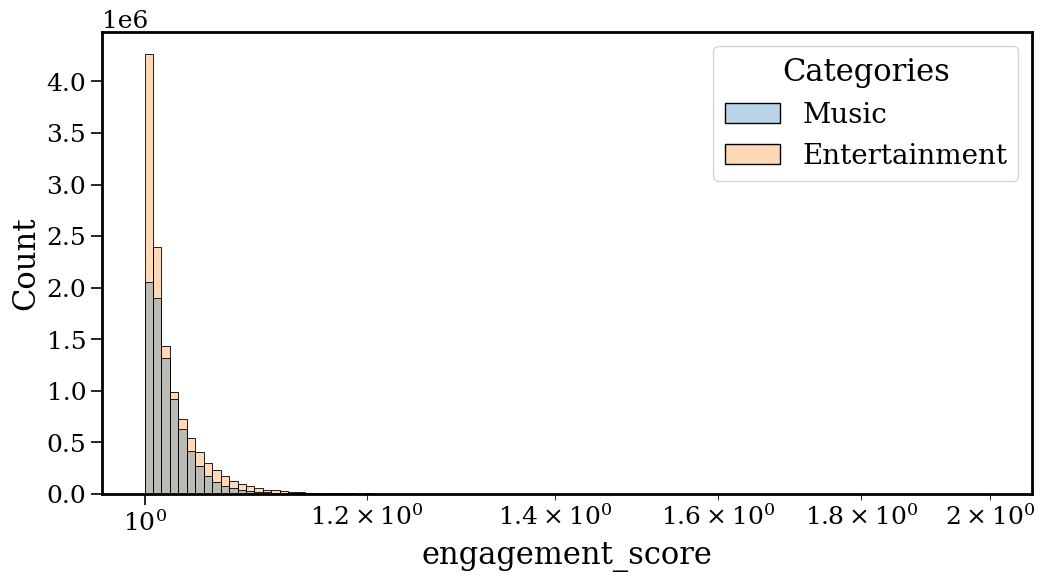

In [24]:
# df_metadata_compare =  pd.concat([df_music_filtered, df_entertainment_filtered], axis=0)
data_utils.compare_distribution_across_categories(df_metadata_compare,
                                                  columns=["engagement_score"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[True],
                                                  kind="hist",
                                                  hue="categories")



In [12]:
# print(df_metadata_compare['engagement_score'].describe())
print(df_metadata_compare['engagement_score'].quantile(0.90))

0.047415154447010686


In [16]:
# Définition du CPM hypothétique pour chaque catégorie
cpm_music = 1.5
cpm_entertainment = 2.0

# Calculer le revenu estimé pour df_music
df_music['duration_factor'] = 1 + 0.5 * (df_music['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_music['estimated_revenue'] = (
    (df_music['view_count'] / 1000) * cpm_music * df_music['duration_factor']
)

# Calculer le revenu estimé pour df_entertainment
df_entertainment['duration_factor'] = 1 + 0.5 * (df_entertainment['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_entertainment['estimated_revenue'] = (
    (df_entertainment['view_count'] / 1000) * cpm_entertainment * df_entertainment['duration_factor']
)

/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_91189/1659499970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['duration_factor'] = 1 + 0.5 * (df_music['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_91189/1659499970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_music['estimated_revenue'] = (
/var/folders/pc/lj2gnb894758vpptg5pzl1pc0000gn/T/ipykernel_91189/1659499970.py:12: SettingWithCopyWarning

In [23]:
print(df_entertainment['estimated_revenue'].describe())
print(df_music['estimated_revenue'].describe())

# plt.hist(df_music['estimated_revenue'], bins=50, alpha=0.5, label='Music')
# plt.hist(df_entertainment['estimated_revenue'], bins=50, alpha=0.5, label='Entertainment')
# plt.xlabel('Revenu estimé ($)')
# plt.ylabel('Nombre de vidéos')
# plt.legend(loc='upper right')
# plt.title('Distribution des revenus estimés pour Music et Entertainment')
# plt.show()

count    1.199624e+07
mean     5.497949e+02
std      8.416447e+03
min      2.000000e-03
25%      1.832000e+00
50%      1.144800e+01
75%      8.000600e+01
max      7.039717e+06
Name: estimated_revenue, dtype: float64
count    8.079232e+06
mean     5.300700e+02
std      1.471558e+04
min      1.500000e-03
25%      1.161000e+00
50%      5.845500e+00
75%      3.505350e+01
max      9.764902e+06
Name: estimated_revenue, dtype: float64


In [8]:
# data_utils.get_stats_on_category(df_metadata_music,
#                                  type='video_metadata', 
#                                  category_name='music', 
#                                  corr_method='spearman', 
#                                  verbose=False)

In [9]:
# categories = ["Music", "Entertainment"]
# df_metadata_entertainment = pd.read_parquet(f"{VIDEO_METADATA_PATH}/Entertainment.parquet.gz")

In [10]:
# df_metadata_compare =  pd.concat([df_metadata_music, df_metadata_entertainment], axis=0)
# data_utils.compare_distribution_across_categories(df_metadata_compare,
#                                                   columns=["duration"],
#                                                   categories=categories,
#                                                   x_logs=[True],
#                                                   y_logs=[False],
#                                                   kind="hist",
#                                                   hue="categories")